<a href="https://colab.research.google.com/github/jojosam90/ltsm/blob/main/Multivariate%20Time%20Series%20Modeling%20using%20LSTM_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [465]:
#from google.colab import drive
#drive.mount('/content/drive')

In [466]:
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import datetime
import numpy as np
import seaborn as sns

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [467]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Energy/Year 2017_1.csv')

In [468]:
df

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [469]:
# df['Start Date'] = pd.to_datetime(df['Start Date'], format='%Y-%m-%d %H:%M:%S') 
# df['End Date'] = pd.to_datetime(df['End Date'], format='%Y-%m-%d %H:%M:%S')

In [470]:
df

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5081 entries, 0 to 5080
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StartDateTime  5081 non-null   object 
 1   Total kWh      5081 non-null   float64
dtypes: float64(1), object(1)
memory usage: 79.5+ KB


In [472]:
check_nan_in_df = df.isnull()
print (check_nan_in_df)

      StartDateTime  Total kWh
0             False      False
1             False      False
2             False      False
3             False      False
4             False      False
...             ...        ...
5076          False      False
5077          False      False
5078          False      False
5079          False      False
5080          False      False

[5081 rows x 2 columns]


In [473]:
df1 = df.dropna()

In [474]:
df1

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [475]:
# df1['StartDateTime'] = pd.to_datetime(df1['Start Date'].astype(str) + ' ' +df1['Start Time'].astype(str))

In [476]:
# df1['EndDateTime'] = pd.to_datetime(df1['End Date'].astype(str) + ' ' +df1['End Time'].astype(str))

In [477]:
# df1 = df1.drop(columns=['_id','CP ID','Start Date', 'Start Time','End Date','End Time'])
# df1=df1[['StartDateTime','EndDateTime','Connector','Site','Model','Total kWh']]
# df1

In [478]:
# df1['Duration'] = df1['EndDateTime'] - df1['StartDateTime']
# df1['Duration'] = df1['Duration'] / np.timedelta64(1, 'h')

In [479]:
# #df1 = df1.drop(columns=['StartDateTime','EndDateTime'])
# df1 = df1.drop(columns=['EndDateTime','Duration','Site','Model'])
df1=df1[['StartDateTime','Total kWh']]
df1

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [480]:
# delete duplicate rows
df1 = df1.drop_duplicates()

In [481]:
df1["StartDateTime"] = pd.to_datetime(df1["StartDateTime"])

df1 = df1.sort_values(by="StartDateTime")

In [482]:
df1

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [483]:
#df1[~(df1 == 0).all(axis=1)]

#make sure every hour is in the datetime
df1 = df1.set_index("StartDateTime").resample("1h").last()

df1

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.870
2016-01-09 08:00:00,10.380
2016-01-09 09:00:00,3.580
2016-01-09 10:00:00,8.250
2016-01-09 11:00:00,10.210
...,...
2017-12-08 19:00:00,10.097
2017-12-08 20:00:00,NaN
2017-12-08 21:00:00,13.000


In [484]:
df1.dropna(subset=['Total kWh'], how='all', inplace=True)

In [485]:
df1

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.870
2016-01-09 08:00:00,10.380
2016-01-09 09:00:00,3.580
2016-01-09 10:00:00,8.250
2016-01-09 11:00:00,10.210
...,...
2017-12-08 18:00:00,6.570
2017-12-08 19:00:00,10.097
2017-12-08 21:00:00,13.000


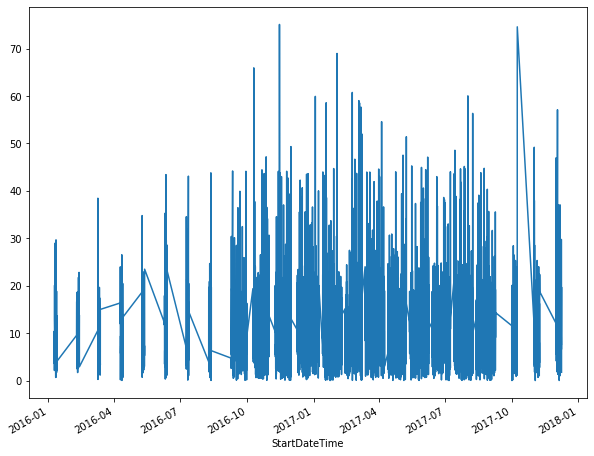

In [486]:
temp = df1['Total kWh']
temp.plot()

In [487]:
df1 = df1[~(df1 == 0).all(axis=1)]

In [488]:
df1

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.870
2016-01-09 08:00:00,10.380
2016-01-09 09:00:00,3.580
2016-01-09 10:00:00,8.250
2016-01-09 11:00:00,10.210
...,...
2017-12-08 18:00:00,6.570
2017-12-08 19:00:00,10.097
2017-12-08 21:00:00,13.000


In [489]:
#df1.to_csv("/content/drive/MyDrive/dataset/Energy/Year 2017_1.csv")

In [490]:
# making data again to remove inconsistencies
temp = df1
dataset = temp['Total kWh'].dropna().values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 25
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [491]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=200, batch_size=70, validation_data=(X_test, Y_test),verbose=1, shuffle=False)

model.summary()

Epoch 1/200
58/58 [==============================] - 4s 17ms/step - loss: 0.0132 - val_loss: 0.0125
Epoch 2/200
58/58 [==============================] - 0s 6ms/step - loss: 0.0120 - val_loss: 0.0124
Epoch 3/200
58/58 [==============================] - 0s 6ms/step - loss: 0.0119 - val_loss: 0.0123
Epoch 4/200
58/58 [==============================] - 0s 7ms/step - loss: 0.0118 - val_loss: 0.0123
Epoch 5/200
58/58 [==============================] - 0s 6ms/step - loss: 0.0118 - val_loss: 0.0123
Epoch 6/200
58/58 [==============================] - 0s 6ms/step - loss: 0.0118 - val_loss: 0.0123
Epoch 7/200
58/58 [==============================] - 0s 6ms/step - loss: 0.0118 - val_loss: 0.0123
Epoch 8/200
58/58 [==============================] - 0s 7ms/step - loss: 0.0118 - val_loss: 0.0123
Epoch 9/200
58/58 [==============================] - 0s 7ms/step - loss: 0.0118 - val_loss: 0.0122
Epoch 10/200
58/58 [==============================] - 0s 6ms/step - loss: 0.0118 - val_loss: 0.0123
Epoch 11

In [492]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [493]:
mape_train = np.mean(np.abs((Y_train[0] - train_predict[:,0]) / Y_train[0])) * 100
mape_test = np.mean(np.abs((Y_test[0] - test_predict[:,0]) / Y_test[0])) * 100

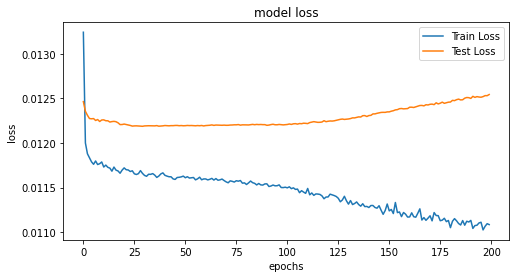

In [494]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

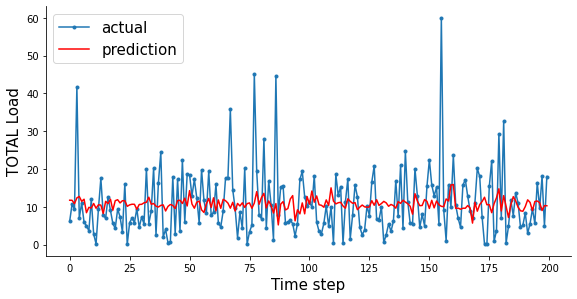

In [495]:
idx = 200
aa=[x for x in range(idx)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:idx], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('TOTAL Load', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();